># E-01_RockScissorPaper 가위바위보 분류기 만들기

<details>
<summary>▶목차</summary>
<div markdown="1"> 

|   Chapter               | details             |
|-------------------------|---------------------|
|1-1 |인공지능과 가위바위보 하기                    |
|1-2 |데이터를 준비하자 |
|1-3 |딥러닝 네트워크 설계하기                      |
|1-4 |딥러닝 네트워크 학습시키기                    |
|1-5 |얼마나 잘 만들었는지 확인하기                  |
|1-6 |더 좋은 네트워크 만들어 보기                  |
|1-7 |미니 프로젝트 : 가위바위보 분류기를 만들자      |
|1-8 |깃허브 주소 업로드                           |
  <details>
<summary>▶딥러닝 순서</summary>
<div markdown="1"> 

  | 딥러닝순서                                             | 상세내용                                       |
|------------------------------------------------------|------------------------------------------------|
|1. 데이터 준비       |데이터셋을 구성한다                |
|2. 딥러닝 네트워크 설계   |데이터셋의 다양성, 정규화 등의 시도가 적절하였음|
|3. 학습|학습모델을 사용하여 학습시킨다.                             |
|4. 테스트(평가)| 학습한 내용을 파악하고 예측을 시도해본다|
</div>
</details>    


</div>
</details>

<details>
<summary>▶루브릭 평가 기준</summary>
<div markdown="1"> 
    
- 아래의 기준을 바탕으로 프로젝트를 평가합니다.

| 평가문항                                             | 상세기준                                       |
|------------------------------------------------------|------------------------------------------------|
|1. 이미지 분류기 모델이 성공적으로 만들어졌는가?      |트레이닝이 정상적으로 수행되었음                |
|2. 오버피팅을 극복하기 위한 적절한 시도가 있었는가?   |데이터셋의 다양성, 정규화 등의 시도가 적절하였음|
|3. 분류모델의 test accuracy가 기준 이상 높게 나왔는가?|60% 이상 도달하였음                             |
    
</div>
</details>


# 1-1. 인공지능과 가위바위보 하기
## 간단한 이미지 분류기

### Q1. 가위바위보 분류기를 만들 것인데 어떻게 만들지?

### Q2. 왜 만들어야 할까?

>위에 2개의 물음부터 시작한다
#A1. 우선적으로 해야 할 것이 무엇일까? 부터 생각해보자
딥러닝 순서가 궁금하다
-일반적으로 딥러닝 기술은 "데이터 준비 → 딥러닝 네트워크 설계 → 학습 → 테스트(평가)"의 순서대로 만들게 됩니다.
정리해보면

## 딥러닝 순서
### 1. 데이터 준비
### 2. 딥러닝 네트워크 설계
### 3. 학습
### 4. 테스트(평가)

> 딥러닝의 예로는 숫자 손글씨 분류기가 있다.
가위바위보 분류기를 하기 이전에 숫자 손글씨 분류기를 접해봤다.

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os


print(tf.__version__)   # Tensorflow의 버전을 출력

mnist = keras.datasets.mnist

# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 자동으로 진행됩니다. 
(x_train, y_train), (x_test, y_test) = mnist.load_data()   

print(len(x_train))  # x_train 배열의 크기를 출력

2.6.0
60000


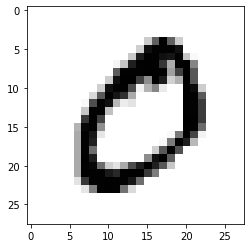

In [2]:
plt.imshow(x_train[1],cmap=plt.cm.binary)
plt.show()

In [3]:
print(y_train[1])

0


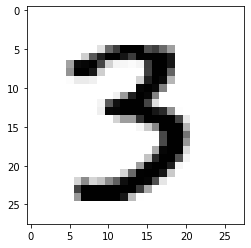

10001 번째 이미지의 숫자는 바로  3 입니다.


In [4]:
# index에 0에서 59999 사이 숫자를 지정해 보세요.
index=10000     
plt.imshow(x_train[index],cmap=plt.cm.binary)
plt.show()
print( (index+1), '번째 이미지의 숫자는 바로 ',  y_train[index], '입니다.')

In [5]:
print(x_train.shape)

(60000, 28, 28)


In [6]:
print(x_test.shape)

(10000, 28, 28)


In [7]:
print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train))

최소값: 0  최대값: 255


In [8]:
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
print('최소값:',np.min(x_train_norm), ' 최대값:',np.max(x_train_norm))

최소값: 0.0  최대값: 1.0


# 1-3. 딥러닝 네트워크 설계하기
##Sequential Model을 사용해 보자

###텐서플로우 케라스(tf.keras)에서 Sequential API 사용해보기
- 장점 : 매우 간단하게 딥러닝 모델을 만들어낼 수 있는 방법
- 단점 : 개발의 자유도는 많이 떨어진다

###케라스에서 모델을 만드는 방법?
- Sequential API
- Functional API

###tf.keras의 Sequential API를 이용하여 LeNet이라는 딥러닝 네트워크를 설계한 예
###케라스 -> Sequential API -> LeNet 사용

In [9]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


In [ ]:
# 케라스 모델 Sequential 사용하였다.
model=keras.models.Sequential()

#Conv2D 는 16개의 필터를 사용하였고 3 X 3으로 했다.
#Activation은 Relu(렐루)라는 기준치를 정하는 모델을 사용하였다.
#Relu 비선형모델 사용했다.
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))

#MaxPool은 말그대로 최고의 값을 뽑아내는 것이다. 2 x 2로 말이다.
model.add(keras.layers.MaxPool2D(2,2))

#한번더 Conv2D 32개의 필터를 사용하였고 3 x 3으로 했다.
#Relu 비선형모델 사용했다.
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))

#MaxPool은 말그대로 최고의 값을 뽑아내는 것이다. 2 x 2로 말이다.
#MaxPooling = MaxPool 같은 표현이다.
model.add(keras.layers.MaxPooling2D((2,2)))

#Flatten 평탄화작업을 한다.
model.add(keras.layers.Flatten())

#Dense 는 대체로 마지막에 모든 것을 연결하는 역할을 한다.
#Relu 비선형모델 사용했다.
model.add(keras.layers.Dense(32, activation='relu'))

#Dense 는 대체로 마지막에 모든 것을 연결하는 역할을 한다.
#softmax 비선형모델 사용했다.
model.add(keras.layers.Dense(10, activation='softmax'))

#Model에 layers의 개수를 파악한다.
print('Model에 추가된 Layer 개수: ', len(model.layers))

In [10]:
# Model: "sequential" 작동
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

# 1-4. 딥러닝 네트워크 학습시키기

네트워크의 입력은 (데이터갯수, 이미지 크기 x, 이미지 크기 y, 채널수) 와 같은 형태

In [11]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 1)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 1)

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

Before Reshape - x_train_norm shape: (60000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)
After Reshape - x_train_reshaped shape: (60000, 28, 28, 1)
After Reshape - x_test_reshaped shape: (10000, 28, 28, 1)


In [12]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1940 - accuracy: 0.9413
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0642 - accuracy: 0.9802
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0460 - accuracy: 0.9858
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0364 - accuracy: 0.9886
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0308 - accuracy: 0.9900
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0238 - accuracy: 0.9923
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0212 - accuracy: 0.9934
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0171 - accuracy: 0.9943
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0143 - accuracy: 0.9950
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.012

In [ ]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10) #epochs = 10 반복의 횟수를 정한다
#현재 10으로 10번을 반복한다고 해놓았다.
#반복을 많이 한다고 좋은 결과 값은 아니다 
#반복의 숫자를 변경해본 결과 많이 한다고 정확도가 높아지는 것은 아니였다.
#결국 데이터의 질이 중요하다.

loss: 0.0127 - accuracy: 0.9957 #손실 데이터 와 정확도
#손실데이터는 loss: 0.0127
#인식정확도는 accuracy: 0.9957  : 99퍼센트를 수치로 나타낸다
#학습할때 마다 정확도는 변동이 있음

# 1-5. 얼마나 잘 만들었는지 확인하기

## 테스트 데이터로 성능을 확인

In [13]:
#evaluate 모델을 사용해서 데이터 성능 확인
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

313/313 - 1s - loss: 0.0385 - accuracy: 0.9898
test_loss: 0.038462307304143906 
test_accuracy: 0.989799976348877


>test_loss: 0.038462307304143906 : 손실데이터(3.84%) = 0.038462307304143906
test_accuracy: 0.989799976348877 : 인식정확도(98.97%) = 0.989799976348877

In [ ]:
# 데이터를 보고 판단을 할 수 있어야 한다.
# 데이터 값에 따른 예측을 해봐야 한다.*필수
# 데이터를 보고 추론할 수 있어야 한다.

In [14]:
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [2.8140332e-14 2.1911899e-11 8.6677602e-08 2.3819385e-10 2.3814204e-14
 7.8958737e-17 7.9151156e-24 9.9999988e-01 1.1069598e-12 2.1267547e-10]
model이 추론한 가장 가능성이 높은 결과 :  7
실제 데이터의 라벨 :  7


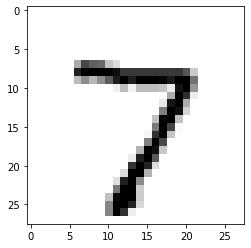

In [15]:
# 실제 추론한 결과가 실제로 나오는 지 확인 할 필요가 있다.
#show() 함수를 사용하여 보도록 하자
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()
#아래와 같이 7이 표시되는 것을 볼 수 있다.

예측확률분포: [2.4613008e-04 3.0261627e-04 1.2390405e-01 1.5951206e-03 1.6180442e-06
 6.3380152e-01 3.7354239e-10 6.1186979e-04 1.0386896e-06 2.3953605e-01]
라벨: 9, 예측결과: 5


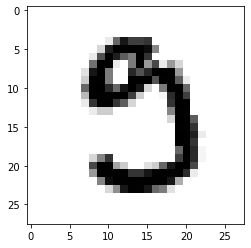

예측확률분포: [1.9257929e-11 2.2448163e-11 9.5403536e-08 5.5117759e-09 5.1551892e-09
 1.2236605e-07 4.9346878e-20 6.4557292e-03 1.6229711e-01 8.3124691e-01]
라벨: 8, 예측결과: 9


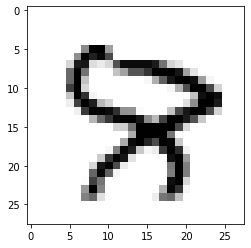

예측확률분포: [3.04480145e-05 9.47462559e-01 1.15663219e-07 1.06153156e-10
 4.82699397e-04 5.84372552e-03 4.43045720e-02 2.41153566e-06
 1.87262334e-03 8.19095192e-07]
라벨: 6, 예측결과: 1


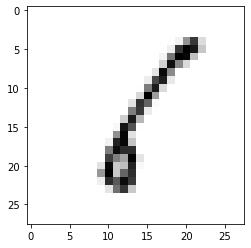

예측확률분포: [1.0098214e-10 6.2198754e-13 9.1787696e-01 8.2122855e-02 1.8334875e-11
 4.5928311e-13 4.6518274e-14 1.5850030e-07 2.9283769e-09 8.7532854e-08]
라벨: 3, 예측결과: 2


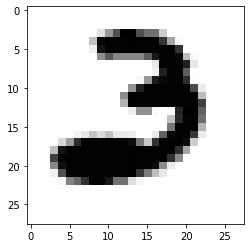

예측확률분포: [1.9474952e-10 4.8942872e-09 4.4960972e-11 6.6043879e-07 2.6265335e-01
 2.4016753e-08 2.0339759e-12 6.2722114e-07 3.5975748e-07 7.3734498e-01]
라벨: 4, 예측결과: 9


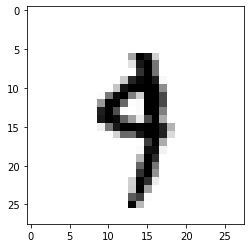

In [16]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

예측결과 값이 많이 다른 결과 값을 가진다.
이것만 봐도 모델의 성능이 좋지 않은 것을 볼 수 있다.
그렇다면 어떻게 하면 모델의 성능을 높일 지 고민이 필요하다.

우선 생각이 나는 부분은 바로 시각화를 하면서 성능을 확인하고 모델의 크기를 조금 크게 해서 해보면 인식률이 좋아지지 않을까 생각해보고(이거는 조금 아쉬움이 있을 것 같고 오히려 판단하기 어려워서 성능이 안 좋아질 것 같다)
또 한가지는 글씨의 위치가 일정하지 않아서 인식 범위를 높이는 방법이 있을 것 같다.(위에서는 아닌 것 같았는데 생각해보니 범위를 키우면 인식률이 더 나아 질 것 같은 막연한 생각이 든다.

### 추론결과를 시각화하여 살펴보는 것은 model 성능 개선에 도움이 되는 아이디어를 얻을 수 있는 좋은 방법 중 하나다

### 꼭 시각화를 하라

# 1-6. 더 좋은 네트워크 만들어 보기

## Q.더 좋은 네트워크는 무엇일까?

- 인식률이 높은 것을 좋은 네트워크라고 생각하는데
- 글만 봐서는 인식률의 기준이 없기 때문에 어떤 값이 높은 건지 확인 할 방법이 없다.
- 기준을 정하는 것이 중요할 것 같다.
- 예) 99%이상일 경우, 97%이상일 경우, 90%이상일 경우 등 다양한 기준을 우선 정하는 것이 제일 중요할 것 같다.

In [17]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=80
n_channel_2=96
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 80)        800       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 80)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 96)        69216     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 96)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2400)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                76832     
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [ ]:
# Epoch 하는 동안 표를 어떻게 만들지 라는 생각에 빠졌다.
# 표가 아주 깔끔하다. 그래서 더 궁금해진다.
# Q. 표는 어떻게 만든 걸까?

Q. 하이퍼파라미터를 바꾸어가면서  최고로 높은 점수를 얻은 네트워크 모델 코드와 그 때의 시험용 데이터 인식률 값을 올려주세요.

이라는 물음에 나는 이렇게 답했다.

### 바꿔 볼 수 있는 하이퍼파라미터들
### 이때 하이퍼 파라미터라는 것을 조금 알것같은 느낌이였다.
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

기존 주어진 하이퍼파라미터들의 값으로 했을 경우
epoch= 10 # 반복의 횟수 10회 epoch를 적용하였고
그 결과 값은 accuracy: 0.9900 # 정확도는 0.9900 이 나왔습니다.
313/313 - 1s - loss: 0.0420 - accuracy: 0.9900
test_loss: 0.042001739144325256 
test_accuracy: 0.9900000095367432

#epoch의 값에 변화 - 반복횟수를 2배로 늘려 적용하였습니다.
#결과값인 정확도가 오히려 0.0022 줄어들었습니다. - accuracy: 0.9878
#이걸보면 같은 자료를 무조건 반복적인 트레이닝을 한다고해서 좋은 정확도를 가져다 주지는 못한다는 것을 단면이지만 볼 수 있었습니다.
그래서 epoch를 무조건 늘리는 것은 정확도에 좋은 영향은 아니라고 현재의 결론이 났구요
epoch=20 #반복횟수 = 20회
313/313 - 1s - loss: 0.0597 - accuracy: 0.9878
test_loss: 0.05966406315565109 
test_accuracy: 0.9878000020980835

#위에 값에서 epoch의 반복횟수를 2배로 늘려보았으나 오히려 정확도가 줄어들어서
이번에는 기존값에서 필터의 갯수를 2배씩 늘려봤습니다.

n_channel_1,2 의 값을 2배씩 증가하여서 적용해봤습니다.

n_channel_1=32 # Conv2D = 16 -> 32
n_channel_2=64 # Conv2D = 32 -> 64
n_dense=32
n_train_epoch=10

굿뉴스입니다 정확도가 0.0009 조금 올라갔습니다.
이걸로봐서는 조금 올라갔지만 그래도 향샹되는 점을 알게 되었으므로 필터의 갯수를 2배로 늘리는 것이 정확도 향상에 도움이 된다고 느껴집니다.
313/313 - 1s - loss: 0.0348 - accuracy: 0.9909
test_loss: 0.03482171520590782 
test_accuracy: 0.9908999800682068

# 위에 값에서 dense 의 값을 두배로 올려보았는데요
이런 기존 위에 값에서 0.0001 줄어들었습니다.
그런데 말입니다~ 왜 dense의 값을 늘렸는데 정확도가 줄었을까요? 적은 수치이지만 이점이 궁금하네요.
n_channel_1=32
n_channel_2=64
n_dense=64
n_train_epoch=10

313/313 - 1s - loss: 0.0375 - accuracy: 0.9908
test_loss: 0.03754637762904167 
test_accuracy: 0.9908000230789185

#역시 필터를 높이니깐 정확도가 높아졌네요
n_channel_1=64 # 36 -> 64
n_channel_2=80 # 64 -> 80
n_dense=32
n_train_epoch=10

313/313 - 1s - loss: 0.0294 - accuracy: 0.9915
test_loss: 0.029387960210442543 
test_accuracy: 0.9915000200271606

#신기한 일입니다 필터값을 더 높였는데요
오히려 정확도가 이전값에 비해 0.0003 이 줄어서 나왔네요
정확도가 떨어졌습니다. 필터의 갯수를 늘리는 것이 정확도를 온전히 올리는 것은 아니라는 단면을 볼 수 있었습니다. 
n_channel_1=80
n_channel_2=96
n_dense=32
n_train_epoch=10

313/313 - 1s - loss: 0.0349 - accuracy: 0.9912
test_loss: 0.034946125000715256 
test_accuracy: 0.9911999702453613

#최고로 높게 나온 0.9915로 선택하였습니다.
역시 필터를 높이니깐 정확도가 높아졌네요
여러 하이퍼파라미터 값을 조정해보면서 다양한 실험을 해봤습니다.
결론은 무작정 값을 높인다고 높은 정확도가 올라가는 것이 아니라고 느꼈고
결과적으로는 필터의 갯수를 높이는 작업이 제일 정확도에 많은 영향력이 있었다고 정리해볼 수 있을 것 같습니다.
n_channel_1=64 # 36 -> 64
n_channel_2=80 # 64 -> 80
n_dense=32
n_train_epoch=10

313/313 - 1s - loss: 0.0294 - accuracy: 0.9915
test_loss: 0.029387960210442543 
test_accuracy: 0.9915000200271606

> 이때까지 재미있었던 것 같다.
그래서 이렇게도 해보고 저렇게도 해보고 다양한 방법을 시도해봤다.

# 1-7. 미니 프로젝트 : 가위바위보 분류기를 만들자

## 데이터 준비가 필수다

가위바위보를 만드려면 우선 가위바위보 이미지 데이터셋이 필요하다
그걸 쉽게 만들 수 있는 머신러닝을 쉽게 다룰 수 있게 만들어주는 구글에서 만든 티처블머신이 있다.

https://teachablemachine.withgoogle.com/

이 링크로 들어가면 웹캠을 활용하여 연속되게 촬영된 이미지도 저장 할 수 있고 고정해서 한컷씩 이미지데이터를 저장할 수 도 있다.

### 디렉토리 만들기
리눅스의 우분투를 이용해서 제공해주는 클라우드에 디렉토리 만들기를 한다.

디렉토리를 만드는 이유는 간단하다
그 이유는 바로~

디렉토리로 구분하고 구분된 폴더(디렉토리)에 해당하는 이미지 파일들을 넣어 주기 위함이다.

우분투에서는 파일 디렉토리 만들기를 할때 이와같이한다.
 mkdir -p ~/aiffel/rock_scissor_paper/scissor

make directory = mkdir -하고 나오는 것은 옵션이다.
- 옵션의 대한 부분 잘 숙지가 필요할 것 같다.

만든 디렉토리에 해당하는 파일을 넣어주면 되는데

압축이 안된 파일이라면 바로 업로드하면 되지만
압축이 되어 있는 파일은 압축을 해제하고 파일들을 해당하는 디렉토리에 넣어주면 된다.

압축을 해지할 디렉토리로 이동한다.

>디렉토리 이동
cd 디렉토리
cd ~/디렉토리/파일

>압축 푸는 방법(zip파일 경우)
unzip 파일명.확장자명
unzip rock.zip

라벨:  5


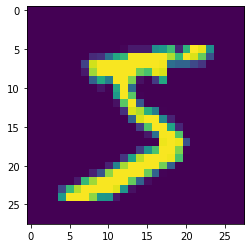

In [18]:
from matplotlib import pyplot as plt # 오류가 나서 추가를 했어요
#내가 지운건지 계속 에러나서 찾아보니 plt을 써야 하므로 필요했다.

plt.imshow(x_train[0]) # plt 네임에러도 나서 추가 위에꺼를 가져왔습니다.
print('라벨: ', y_train[0])

In [ ]:
import os
import glob #glob NameError가 떠서 추가했다.

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

In [19]:
from PIL import Image
import os, glob
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np
#필요한건 다 추가 하였다.

In [20]:
from PIL import Image
import os, glob
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


In [ ]:
#가위 100개의 이미지를 resize 완료!

In [21]:
from PIL import Image
import os, glob
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
바위 이미지 resize 완료!


In [ ]:
#바위 100개의 이미지를 resize 완료!

In [22]:
from PIL import Image
import os, glob
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
보 이미지 resize 완료!


In [23]:
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


In [ ]:
#클래스의 대한 라벨링

라벨:  0


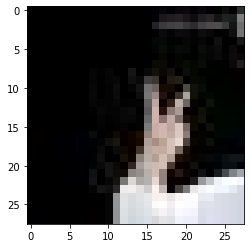

In [24]:
plt.imshow(x_train[0])
print('라벨: ', y_train[3])

In [ ]:
#가상배경을 만들어주는 XSplit Vcam이라는 프로그램으로 바탕색을 검정으로 하고 티처블 머신을 사용했다.

In [25]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
model=keras.models.Sequential()
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
# [[YOUR CODE]]
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                51264     
_________________________________________________________________
dense_5 (Dense)              (None, 3)                

In [ ]:
#Model: "sequential_2" 사용했다.
# 토탈 파라미터들 : Total params: 56,547
# 트레이닝할수있는 파라미터들 : Trainable params: 56,547

In [26]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.compile()과 model.fit()을 사용해 봅시다.
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=10)

Epoch 1/10
10/10 [==============================] - 0s 11ms/step - loss: 0.9493 - accuracy: 0.6433
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 0.5965 - accuracy: 0.8533
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 0.3215 - accuracy: 0.9167
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1864 - accuracy: 0.9433
Epoch 5/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0914 - accuracy: 0.9800
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0561 - accuracy: 0.9833
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0488 - accuracy: 0.9933
Epoch 8/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0313 - accuracy: 0.9967
Epoch 9/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0216 - accuracy: 0.9933
Epoch 10/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0114 - accuracy: 1.0000


In [27]:
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [28]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.evaluate()을 사용해 봅시다.
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_test_norm, y_test, epochs=10)

Epoch 1/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0151 - accuracy: 1.0000
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0076 - accuracy: 1.0000
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 5/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 5.4958e-04 - accuracy: 1.0000
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 4.8052e-04 - accuracy: 1.0000
Epoch 8/10
10/10 [==============================] - 0s 3ms/step - loss: 3.6745e-04 - accuracy: 1.0000
Epoch 9/10
10/10 [==============================] - 0s 3ms/step - loss: 3.0537e-04 - accuracy: 1.0000
Epoch 10/10
10/10 [==============================] - 0s 3ms/step - loss: 2.6177e-04 - accuracy: 1.0000

In [ ]:
# loss: 2.6177e-04 - accuracy: 1.0000

# 모델 테스트

In [35]:
test_loss, test_accuracy = model.evaluate(x_test_norm,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 4.2915e-06 - accuracy: 1.0000
test_loss: 4.291525328881107e-06 
test_accuracy: 1.0


# 더 좋은 네트워크 만들어보기
- 많은 데이터를 활용해야 하는데
- 교류하면서 하지 못한점 데이터 교류가 되지 않아서 그 점이 아쉽움으로 남는다.
- 시각화를 통해서 성능을 평가해보고 예측을 해보면서 더 좋은 최적적합을 찾을 수 있을 것 같다.

# 이번 노드를 마치며... 회고
- 첫 Exploration이여서 감회가 우선 새롭고 데이터의 대해서 조금은 딥러닝의 대해서 조금은 알아가는 것 같은 느낌이다.
지금은 이런게 있구나 하는 정도 이고 이것을 어떻게 사용해야 더 좋은 결과치가 나올지 정확도가 높아질 지에 대한 의문은 계속 품고 있다.
깃허브에 파일 올리는 것도 트레이닝 데이터를 테스트 데이터로 사용하는 방법등 굉장한 이슈들이 많았다.
그러한 이슈들을 이제 더 많이 생길텐데 그때마다 이전 노드를 복습하면서 또는 책을 통해서 스터디를 통해서 극복해 나가야 겠다.

좋은 결과도 좋지만 다양한 시도를 통해서 배우는 것이 더 많을 것이다
다양한 모델을 사용해서 여러개의 값을 확인하고 시각화하는 작업을 통해서 많이 배울 수 있을 것 같다.

전체적인 흐름을 모르는 상태에서 하다 보니 정리도 쉽지 않았습니다.

데이터를 활용하는 부분 생각하고 있다.
그래서 비밀리에 내 데이터를 모으고 있다. 힌트는 run이다.
내 데이터를 활용한 분석을 해보려고 한다

내 데이터가 궁금하다면 다음 Exploration을 기대하라~


### 바꿔 볼 수 있는 하이퍼파라미터들
### 이때 하이퍼 파라미터라는 것을 조금 알것같은 느낌이였다.
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

기존 주어진 하이퍼파라미터들의 값으로 했을 경우
epoch= 10 # 반복의 횟수 10회 epoch를 적용하였고
그 결과 값은 accuracy: 0.9900 # 정확도는 0.9900 이 나왔습니다.
313/313 - 1s - loss: 0.0420 - accuracy: 0.9900
test_loss: 0.042001739144325256 
test_accuracy: 0.9900000095367432

#epoch의 값에 변화 - 반복횟수를 2배로 늘려 적용하였습니다.
#결과값인 정확도가 오히려 0.0022 줄어들었습니다. - accuracy: 0.9878
#이걸보면 같은 자료를 무조건 반복적인 트레이닝을 한다고해서 좋은 정확도를 가져다 주지는 못한다는 것을 단면이지만 볼 수 있었습니다.
그래서 epoch를 무조건 늘리는 것은 정확도에 좋은 영향은 아니라고 현재의 결론이 났구요
epoch=20 #반복횟수 = 20회
313/313 - 1s - loss: 0.0597 - accuracy: 0.9878
test_loss: 0.05966406315565109 
test_accuracy: 0.9878000020980835

#위에 값에서 epoch의 반복횟수를 2배로 늘려보았으나 오히려 정확도가 줄어들어서
이번에는 기존값에서 필터의 갯수를 2배씩 늘려봤습니다.

n_channel_1,2 의 값을 2배씩 증가하여서 적용해봤습니다.

n_channel_1=32 # Conv2D = 16 -> 32
n_channel_2=64 # Conv2D = 32 -> 64
n_dense=32
n_train_epoch=10

굿뉴스입니다 정확도가 0.0009 조금 올라갔습니다.
이걸로봐서는 조금 올라갔지만 그래도 향샹되는 점을 알게 되었으므로 필터의 갯수를 2배로 늘리는 것이 정확도 향상에 도움이 된다고 느껴집니다.
313/313 - 1s - loss: 0.0348 - accuracy: 0.9909
test_loss: 0.03482171520590782 
test_accuracy: 0.9908999800682068

# 위에 값에서 dense 의 값을 두배로 올려보았는데요
이런 기존 위에 값에서 0.0001 줄어들었습니다.
그런데 말입니다~ 왜 dense의 값을 늘렸는데 정확도가 줄었을까요? 적은 수치이지만 이점이 궁금하네요.
n_channel_1=32
n_channel_2=64
n_dense=64
n_train_epoch=10

313/313 - 1s - loss: 0.0375 - accuracy: 0.9908
test_loss: 0.03754637762904167 
test_accuracy: 0.9908000230789185

**역시 필터를 높이니깐 정확도가 높아졌네요

n_channel_1=64 # 36 -> 64
n_channel_2=80 # 64 -> 80
n_dense=32
n_train_epoch=10

313/313 - 1s - loss: 0.0294 - accuracy: 0.9915
test_loss: 0.029387960210442543 
test_accuracy: 0.9915000200271606

**신기한 일입니다 필터값을 더 높였는데요
오히려 정확도가 이전값에 비해 0.0003 이 줄어서 나왔네요
정확도가 떨어졌습니다. 필터의 갯수를 늘리는 것이 정확도를 온전히 올리는 것은 아니라는 단면을 볼 수 있었습니다. 

n_channel_1=80
n_channel_2=96
n_dense=32
n_train_epoch=10

313/313 - 1s - loss: 0.0349 - accuracy: 0.9912
test_loss: 0.034946125000715256 
test_accuracy: 0.9911999702453613

**최고로 높게 나온 0.9915로 선택하였습니다.
역시 필터를 높이니깐 정확도가 높아졌네요
여러 하이퍼파라미터 값을 조정해보면서 다양한 실험을 해봤습니다.
결론은 무작정 값을 높인다고 높은 정확도가 올라가는 것이 아니라고 느꼈고
결과적으로는 필터의 갯수를 높이는 작업이 제일 정확도에 많은 영향력이 있었다고 정리해볼 수 있을 것 같습니다.

n_channel_1=64 # 36 -> 64
n_channel_2=80 # 64 -> 80
n_dense=32
n_train_epoch=10

313/313 - 1s - loss: 0.0294 - accuracy: 0.9915
test_loss: 0.029387960210442543 
test_accuracy: 0.9915000200271606
